# Character Recognition using Multilayer Perceptron (MLP)

MLP เป็นโครงข่าย (Network) ประเภทหนึ่งของโครงข่ายประสาทเทียมแบบแพร่ไปข้างหน้า (Feedforward Neural Network)

![MLP](https://res.mdpi.com/information/information-03-00756/article_deploy/html/images/information-03-00756-g002.png)

MLP จะประกอบด้วยจำนวนชั้น (Layer) จำนวนทั้งสิ้น 3 ชั้น คือ
* ชั้นนำเข้า (Input Layer) 
* ชั้นซ่อน (Hidden Layer) และ
* ชั้นแสดงผลลัพธ์ (Output Layer)

## Layer
* **Input Layer** (*z1 - zm*) เป็นชั้นที่จำนวนโหนด (Node) จะถูกกำหนดให้มีจำนวนเท่ากับแอททริบิวต์ (Attribute) ของข้อมูล ยกตัวอย่างเช่น หากข้อมูล 1 แถว (Record) มีจำนวนทั้งสิ้น 6 คอลัมน์ (Attribute) ดังนั้นใน Input Layer จะกำหนดให้มีจำนวน 6 โหนด 
* **Hidden Layer** (*x1 - xn*) เป็นชั้นที่สามารถกำหนดจำนวนของโหนดได้ตามความต้องการ ทั้งนี้ขึ้นอยู่กับการทดลอง โดย Hidden Layer สามารถกำหนดให้มีได้มากกว่า 1 ชั้น
*  **Output Layer** (*y1 - ym*) จะถูกกำหนดให้มีจำนวนโหนด (Node) เท่ากับจำนวนของคลาส (Class) หรือกลุ่ม เช่นตัวเลข 0-9 มีทั้งสิ้น 10 กลุ่ม และตัวอักษรภาษาอังกฤษ a-z มีทั้งหมด 26 กลุ่ม  

## Weight
* การเชื่อมโยงระหว่างโหนดในแต่ละชั้น (Layer) ได้แก่ *Vnm* และ *Wkn* เรียกว่า **Weight** หรือค่าน้ำหนัก ซึ่งได้มาจากการคำนวณ ดังนั้นในการคำนวณแต่ละรอบ (Epoch) ค่า weight จะเปลี่ยนไปตามการคำนวณจากข้อมูลที่วิ่งเข้ามาและค่า weight เดิม

ใช้ Keras เป็น tool ในการเขียนโปรแกรม โดยรันอยู่บน TensorFlow

In [0]:
import keras

## โหลดข้อมูล MNIST

โหลดข้อมูล MNIST มาใช้งาน โดยข้อมูลแบ่งออกเป็น 4 ส่วนประกอบด้วย

    x_train หมายถึง ข้อมูลชุดเรียนรู้ ซึ่งเป็น pixel ของตัวเลข
    y_train หมายถึง Label ของข้อมูลชุดเรียนรู้ ซึ่งมีค่าตั้งแต่ 0-9
    x_test หมายถึง ข้อมูลชุดทดสอบ
    y_test หมายถึง Label ของข้อมูลชุดทดสอบ


In [0]:
from keras.datasets import mnist
#keras will automatically download the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
(xx_train, yy_train), (xx_test, yy_test) = mnist.load_data()

## แสดงตัวอย่างข้อมูล MNIST

type of training data <class 'numpy.ndarray'>
size of training data (60000, 28, 28)
size of test data (10000, 28, 28)


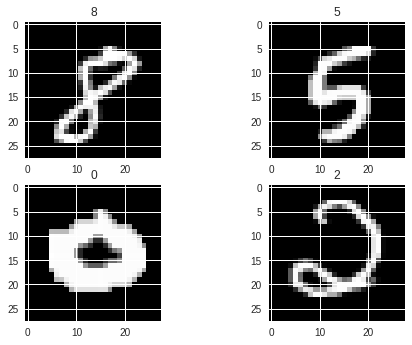

In [0]:
import matplotlib.pyplot as plt
import random

#get the size of the dataset
print('type of training data', type(x_train))
print('size of training data', x_train.shape)
print('size of test data', x_test.shape)

#set the seed so our random tests are reproducible
random.seed(49)


train_size = len(x_train)

r1 = random.randint(0, train_size-1)
r2 = random.randint(0, train_size-1)
r3 = random.randint(0, train_size-1)
r4 = random.randint(0, train_size-1)

# แสดงข้อมูลในส่วนของ training data
plt.subplot(221)
plt.imshow(x_train[r1], cmap=plt.get_cmap('gray'))
plt.title(y_train[r1])
plt.subplot(222)
plt.imshow(x_train[r2], cmap=plt.get_cmap('gray'))
plt.title(y_train[r2])
plt.subplot(223)
plt.imshow(x_train[r3], cmap=plt.get_cmap('gray'))
plt.title(y_train[r3])
plt.subplot(224)
plt.imshow(x_train[r4], cmap=plt.get_cmap('gray'))
plt.title(y_train[r4])

# show the plot
plt.show()

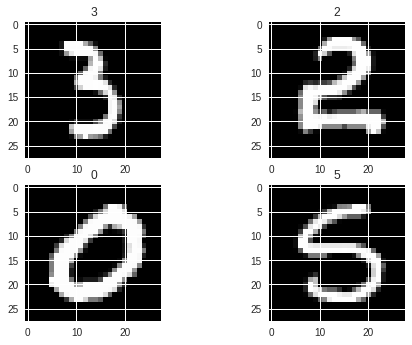

In [0]:
# แสดงข้อมูลในส่วนของ test data

test_size = len(x_test)

random.seed(49)

r1 = random.randint(0, test_size-1)
r2 = random.randint(0, test_size-1)
r3 = random.randint(0, test_size-1)
r4 = random.randint(0, test_size-1)


# แสดงข้อมูลในส่วนของ training data
plt.subplot(221)
plt.imshow(x_test[r1], cmap=plt.get_cmap('gray'))
plt.title(y_test[r1])
plt.subplot(222)
plt.imshow(x_test[r2], cmap=plt.get_cmap('gray'))
plt.title(y_test[r2])
plt.subplot(223)
plt.imshow(x_test[r3], cmap=plt.get_cmap('gray'))
plt.title(y_test[r3])
plt.subplot(224)
plt.imshow(x_test[r4], cmap=plt.get_cmap('gray'))
plt.title(y_test[r4])

# show the plot
plt.show()

## ปรับเปลี่ยนรูปแบบของข้อมูล (Reshape)

ปรับเปลี่ยนรูปแบบของข้อมูลจาก 28x28 ให้เป็น 784

In [0]:
num_pixels = x_train.shape[1] * x_train.shape[2]

print('Before reshape')
print('shape of x_train', x_train.shape)
print('number of pixel', num_pixels)


#reshape each data point into a single row vector of 784 pixel values
x_train = x_train.reshape(x_train.shape[0], num_pixels) / 255
x_test = x_test.reshape(x_test.shape[0], num_pixels) / 255


print('After reshape')
print('shape of x_train', x_train.shape)
print('shape of x_train', x_train.shape)

Before reshape
shape of x_train (60000, 28, 28)
number of pixel 784
After reshape
shape of x_train (60000, 784)
shape of x_train (60000, 784)


## เปลี่ยนรูปแบบของ Label

ปรับเปลี่ยนรูปแบบ Label ทั้งในส่วนของ train และ test

In [0]:
print('Before')

print(y_train[0])
print(y_test[0])

Before
5
7


In [0]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print('After')
print(y_train[0])
print(y_test[0])

After
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


แสดงขนาดของ y_train และตัวอย่างข้อมูลจำนวน 10 รายการ

In [0]:
print('shape of y_train', y_train.shape)
print(y_train[0:10])

shape of y_train (60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# Multilayer Perceptron (MLP)

โหลด Library ของ Keras เพื่อใช้สำหรับสร้าง MLP

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation

### กำหนดจำนวนของ Output Class

In [0]:
#after converting to one-hot format we can get the num classes from the shape
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)

num_classes = y_train.shape[1]

## สร้างโมเดล (Model) ของ MLP

In [0]:
model = Sequential()
model.add(Dense(50, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

## อธิบายวิธีการสร้าง Model

```
model = Sequential()
```

* กำหนดให้ input มีจำนวน 784 โหนด  
* จำนวนของ batch_size มีค่าเท่ากับ 50 หมายถึงในการคำนวณแต่ละครั้ง ข้อมูลจะถูกส่งเข้าไปคำนวณจำนวนครั้งละ 50 ชุด
```
model.add(Dense(50, input_shape=(784,)))
```

* กำหนด activation function ให้เป็นแบบ ReLU (rectified linear unit)
```
model.add(Activation('relu'))
```

* กำหนดให้ dropout = 0.2 ซึ่งหมายถึงการลดจำนวนของโหนดที่ใช้ในการคำนวณ
```
model.add(Dropout(0.2))
```

*  กำหนดให้ชั้นซ่อนชั้นแรกมีจำนวน 1000 โหนด
```
model.add(Dense(1000))
```
```
model.add(Activation('relu'))
model.add(Dropout(0.2))
```

* กำหนดให้ชั้นแสดงผลลัพธ์มีจำนวนโหนดเท่ากับ **num_classes** ซึ่งในกรณีนี้คือ 10 class
```
model.add(Dense(num_classes))
```

* ใช้ฟังก์ชัน softmax เพื่อคำนวณหาคำตอบ โดยผลลัพธ์ที่ได้จะแสดงในรูปแบบของความน่าจะเป็น (probability) โดยค่าที่มากที่สุดคือคำตอบ
```
model.add(Activation('softmax'))
```

## คอมไพล์ (Compile) โมเดล MLP ที่สร้างขึ้น

```
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
```

โดยที่

*  **loss function** ถูกกำหนดให้เป็น `loss='categorical_crossentropy'`` โดยที่ *categorical_crossentropy* จะถูกนำไปใช้กับ output ที่มีมากกว่า 2 กลุ่ม หากมีจำนวน 2 กลุ่มสามารถกำหนดให้เป็น `loss='binary_crossentropy'`
*  **optimizer** ถูกกำหนดให้ใช้ **adam optimization** ใช้สำหรับการปรับปรุงค่า Weight ในแต่ละรอบ (update network weights iterative)


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## การเรียนรู้ (Training) โมเดล MLP โดยใช้คำสั่ง fit

* สามารถเรียนรู้โมเดลโดยใช้คำสั่ง fit ดังต่อไปนี้

```
model.fit(x_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=2)
```

**โดยที่**  
* **validation_split** หมายถึงการแบ่งข้อมูลออกมาเพื่อใช้ในการทดสอบโมเดล โดยที่ 0.1 หมายถึง 10%
* **epochs** หมายถึงจำนวนรอบที่ใช้ในการเรียนรู้ 
* **batch_size** หมายถึงจำนวนของรูปภาพที่ส่งเข้าไปคำนวณในแต่ละครั้ง
* **verbose** หมายถึงการแสดงผลลัพธ์ของการคำนวณ


In [0]:
# Fit and Evaluate
model.fit(x_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 2s - loss: 0.5087 - acc: 0.8450 - val_loss: 0.1673 - val_acc: 0.9522
Epoch 2/10
 - 2s - loss: 0.2393 - acc: 0.9284 - val_loss: 0.1238 - val_acc: 0.9647
Epoch 3/10
 - 2s - loss: 0.1910 - acc: 0.9419 - val_loss: 0.1026 - val_acc: 0.9708
Epoch 4/10
 - 2s - loss: 0.1618 - acc: 0.9500 - val_loss: 0.0958 - val_acc: 0.9720
Epoch 5/10
 - 2s - loss: 0.1463 - acc: 0.9548 - val_loss: 0.0882 - val_acc: 0.9728
Epoch 6/10
 - 2s - loss: 0.1340 - acc: 0.9581 - val_loss: 0.0838 - val_acc: 0.9747
Epoch 7/10
 - 2s - loss: 0.1226 - acc: 0.9609 - val_loss: 0.0842 - val_acc: 0.9748
Epoch 8/10
 - 2s - loss: 0.1121 - acc: 0.9645 - val_loss: 0.0827 - val_acc: 0.9752
Epoch 9/10
 - 2s - loss: 0.1113 - acc: 0.9639 - val_loss: 0.0771 - val_acc: 0.9767
Epoch 10/10
 - 2s - loss: 0.1055 - acc: 0.9663 - val_loss: 0.0770 - val_acc: 0.9768


## ทดสอบประสิทธิภาพของโมเดล ด้วยคำสั่ง evaluate

In [0]:
# Evaluate on the test data
scores = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

Baseline Accuracy: 97.41%


* จากคำตอบ **Baseline Accuracy: 97.41%** ผลลัพธ์ที่ได้จากการทดสอบด้วยชุดทดสอบ (Test set) พบว่าโมเดลที่สร้างมีความถูกต้อง 97.41% 
* หากต้องการความถูกต้องที่เพิ่มสูงขึ้นอาจต้องปรับเปลี่ยนค่าพารามิเตอร์ (Parameter) เช่น จำนวนรอบในการเรียนรู้ หรือปรับเปลี่ยนโมเดล เช่นจำนวนของโหนดในชั้นซ่อน หรือเพิ่มจำนวนชั้นซ่อน เป็นต้น

## ทดสอบการรู้จำตัวเลขจากชุดข้อมูล MNIST

In [0]:
from keras.datasets import mnist
#keras will automatically downlhoad the dataset
(xx_train, yy_train), (xx_test, yy_test) = mnist.load_data()

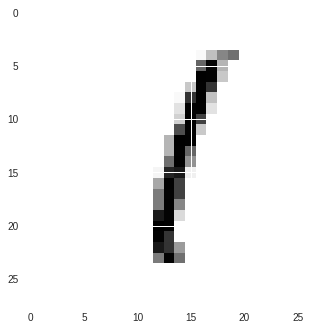

predict class is  [1]


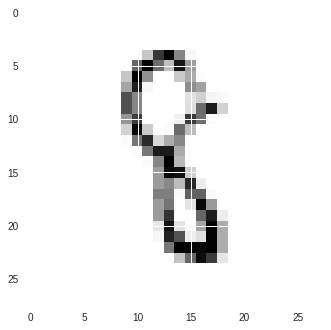

predict class is  [8]


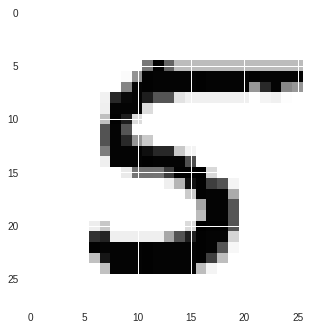

predict class is  [5]


In [0]:
# predict the class
for i in range(0,3):
  r_num = random.randint(0, train_size-1)
  plt.imshow(xx_train[r_num])
  plt.show()            

  output = model.predict_classes([[x_train[r_num]]])
  print("predict class is ", output)